## 1. 기본 설정 ❗

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

import scipy.stats
from scipy.stats import probplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor
from ngboost.distns import *
from ngboost.learners import default_tree_learner
from ngboost.scores import MLE

In [2]:
# 폰트
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = C:\WINDOWS\Fonts\BOLD.TTF
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothic.ttf
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicUltraLight.ttf
NanumGothic = C:\WINDOWS\Fonts\.TTF
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicLight.ttf
NanumGothic = C:\WINDOWS\Fonts\EXTRABOLD.TTF
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicBold.ttf
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicBold.ttf
NanumGothic = C:\Windows\Fonts\BOLD.TTF
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothic.ttf
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicLight.ttf
NanumGothic = C:\Windows\Fonts\EXTRABOLD.TTF
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicUltraLight.ttf
NanumGothic = C:\Windows\Fonts\.TTF


In [3]:
data = pd.read_csv('train_gas.csv', encoding = 'CP949')

In [4]:
data

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [6]:
data.describe()

,시간,공급량
count,368088.000000,368088.000000
mean,12.500000,948.100037
std,6.922196,927.211578
min,1.000000,1.378000
25%,6.750000,221.973000
50%,12.500000,637.014000
75%,18.250000,1398.919000
max,24.000000,11593.617000


<AxesSubplot:>

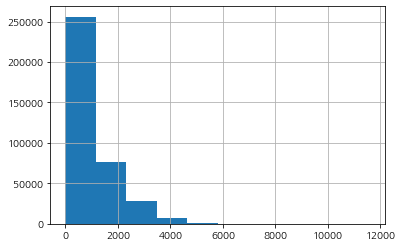

In [7]:
# Train Set의 타겟 변수 분포 확인
data['공급량'].hist()

<AxesSubplot:xlabel='시간'>

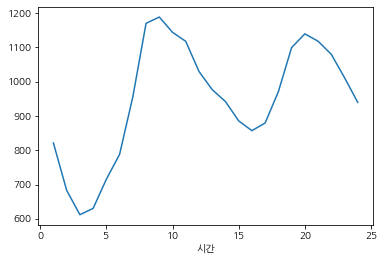

In [8]:
data.groupby(['시간'])['공급량'].mean().plot()

In [9]:
data.groupby(['구분'])['공급량'].mean()

구분
A    1167.014483
B     958.564621
C     131.585481
D     664.626452
E    1395.356673
G    2070.685900
H     248.866646
Name: 공급량, dtype: float64

In [10]:
data.corr()

,시간,공급량
시간,1.000000,0.099112
공급량,0.099112,1.000000


In [11]:
data[['구분']].value_counts()

구분
H     52584
G     52584
E     52584
D     52584
C     52584
B     52584
A     52584
dtype: int64

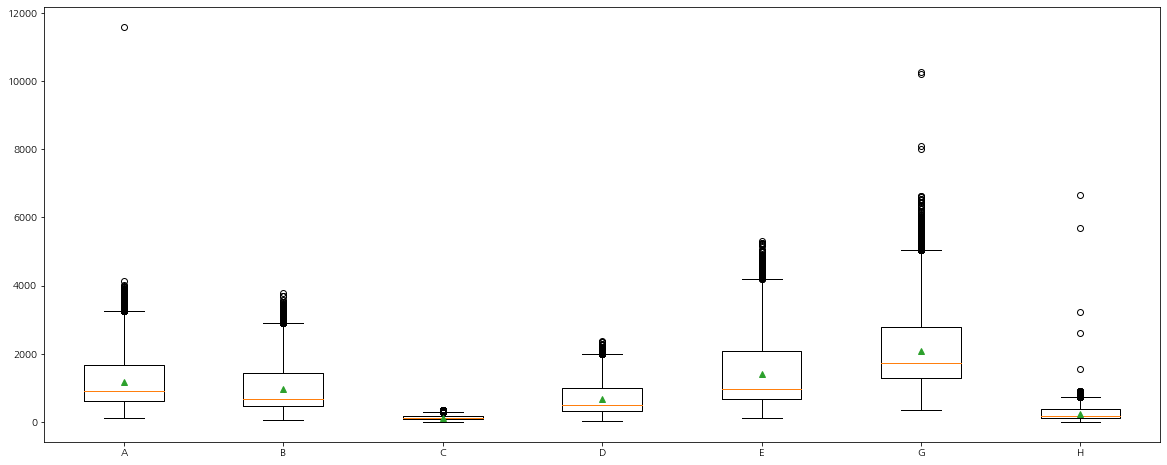

In [12]:
# 공급처별 공급량 박스플롯
plt.figure(figsize=(20,8))
d_d = [data[data['구분']=='A']['공급량'], 
        data[data['구분']=='B']['공급량'],
        data[data['구분']=='C']['공급량'],
        data[data['구분']=='D']['공급량'],
        data[data['구분']=='E']['공급량'],
        data[data['구분']=='G']['공급량'],
        data[data['구분']=='H']['공급량']]

plt.boxplot(d_d,labels=['A','B','C','D','E','G','H'], showmeans=True)
plt.show()

- 공급처별로 다른 모델을 짜야할까...? 짜야겠지...

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [14]:
data['연월일'] = pd.to_datetime(data['연월일'])

data['year'] = data['연월일'].dt.year
data['month'] = data['연월일'].dt.month
data['day'] = data['연월일'].dt.day

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   연월일     368088 non-null  datetime64[ns]
 1   시간      368088 non-null  int64         
 2   구분      368088 non-null  object        
 3   공급량     368088 non-null  float64       
 4   year    368088 non-null  int64         
 5   month   368088 non-null  int64         
 6   day     368088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 19.7+ MB


In [17]:
data = data.loc[:,data.columns != '연월일']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시간      368088 non-null  int64  
 1   구분      368088 non-null  object 
 2   공급량     368088 non-null  float64
 3   year    368088 non-null  int64  
 4   month   368088 non-null  int64  
 5   day     368088 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 16.8+ MB


### train/test 나눠놓기

In [19]:
train_years = [2013,2014,2015,2016,2017]
test_years = [2018]

train = data[data['year'].isin(train_years)]
test = data[data['year'].isin(test_years)]

In [20]:
train.tail()

,시간,구분,공급량,year,month,day
306763,20,H,517.264,2017,12,31
306764,21,H,530.896,2017,12,31
306765,22,H,506.287,2017,12,31
306766,23,H,470.638,2017,12,31
306767,24,H,444.618,2017,12,31


In [21]:
test.head()

,시간,구분,공급량,year,month,day
306768,1,A,1765.008,2018,1,1
306769,2,A,1679.186,2018,1,1
306770,3,A,1610.885,2018,1,1
306771,4,A,1604.123,2018,1,1
306772,5,A,1711.506,2018,1,1


In [22]:
label = label_encoder

train['구분']=label.fit_transform(train['구분'])
test['구분']=label.fit_transform(test['구분'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
X_data = train.loc[:,train.columns != '공급량']
y_target = train['공급량']

In [24]:
X_train, X_valid, y_train, y_valid=train_test_split(X_data, y_target,
                                                  test_size=0.2, random_state=2021)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(245414, 5)
(245414,)
(61354, 5)
(61354,)


In [26]:
X_test = test.loc[:,test.columns != '공급량']
y_answer = test['공급량']

In [27]:
print(X_test.shape)
print(y_answer.shape)

(61320, 5)
(61320,)


### Linear Regression

In [28]:
start_time=time.time()

In [29]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_preds = lr.predict(X_valid)

In [30]:
print(time.time()-start_time)

0.4426426887512207


In [31]:
# test Mean Squared Error
lr_mse = mean_squared_error(y_preds, y_valid)
print("MSE", lr_mse)
lr_rmse = np.sqrt(lr_mse)
print("RMSE", lr_rmse)

MSE 799785.2599525218
RMSE 894.3071396072614


### XGBRegressor

### NGBOOST

##### Normal 분포

In [32]:
start_time=time.time()

In [33]:
ngb = NGBRegressor(Dist=Normal,random_state=0)

ngb.fit(X_train, y_train)

Y_preds = ngb.predict(X_valid)
Y_dists = ngb.pred_dist(X_valid)

[iter 0] loss=8.2311 val_loss=0.0000 scale=1.0000 norm=709.4098
[iter 100] loss=7.7605 val_loss=0.0000 scale=1.0000 norm=455.2534
[iter 200] loss=7.4205 val_loss=0.0000 scale=1.0000 norm=321.3576
[iter 300] loss=7.1224 val_loss=0.0000 scale=1.0000 norm=251.9812
[iter 400] loss=6.9293 val_loss=0.0000 scale=1.0000 norm=221.7663


In [34]:
print(time.time()-start_time)

287.50465989112854


In [35]:
Y_preds

array([138.75809365, 259.89133198, 362.06467362, ..., 125.76505472,
       419.2289279 , 599.16508072])

In [36]:
Y_dists

In [37]:
Y_dists[0]

In [38]:
# test Mean Squared Error
NG_MSE = mean_squared_error(Y_preds, y_valid)
print("MSE", NG_MSE)
NG_RMSE = np.sqrt(NG_MSE)
print("RMSE", NG_RMSE)

# test Negative Log Likelihood
NLL = -Y_dists.logpdf(y_valid.values.flatten()).mean()
print("NLL", NLL)

MSE 99318.38218597985
RMSE 315.148190834058
NLL 6.8227351535812675


### test 예측 후 비교

In [39]:
Y_test_preds = ngb.predict(X_test)
Y_test_dists = ngb.pred_dist(X_test)

In [40]:
predictions = pd.DataFrame(Y_test_dists.loc, columns=['Predictions'])
predictions_upper = pd.DataFrame(Y_test_dists.dist.interval(0.95)[1], columns=['Predictions_upper'])
predictions_lower = pd.DataFrame(Y_test_dists.dist.interval(0.95)[0], columns=['Predictions_lower'])

In [41]:
dd = pd.concat([predictions, predictions_lower, predictions_upper],axis=1).reset_index()
dd

,index,Predictions,Predictions_lower,Predictions_upper
0,0,1789.136013,1036.358495,2541.913531
1,1,1701.597030,948.819513,2454.374548
2,2,1700.937752,948.160235,2453.715270
3,3,1700.937752,948.160235,2453.715270
4,4,1737.175261,984.397743,2489.952779
...,...,...,...,...
61315,61315,778.065173,250.883517,1305.246830
61316,61316,778.065173,250.883517,1305.246830
61317,61317,778.065173,250.883517,1305.246830
61318,61318,778.065173,250.883517,1305.246830


In [42]:
test = test.reset_index()

In [43]:
df_figure = pd.concat([test, dd],axis=1)
df_figure

,index,시간,구분,공급량,year,month,day,index,Predictions,Predictions_lower,Predictions_upper
0,306768,1,0,1765.008,2018,1,1,0,1789.136013,1036.358495,2541.913531
1,306769,2,0,1679.186,2018,1,1,1,1701.597030,948.819513,2454.374548
2,306770,3,0,1610.885,2018,1,1,2,1700.937752,948.160235,2453.715270
3,306771,4,0,1604.123,2018,1,1,3,1700.937752,948.160235,2453.715270
4,306772,5,0,1711.506,2018,1,1,4,1737.175261,984.397743,2489.952779
...,...,...,...,...,...,...,...,...,...,...,...
61315,368083,20,6,681.033,2018,12,31,61315,778.065173,250.883517,1305.246830
61316,368084,21,6,669.961,2018,12,31,61316,778.065173,250.883517,1305.246830
61317,368085,22,6,657.941,2018,12,31,61317,778.065173,250.883517,1305.246830
61318,368086,23,6,610.953,2018,12,31,61318,778.065173,250.883517,1305.246830


In [44]:
df_figure.isna().sum()

index                0
시간                   0
구분                   0
공급량                  0
year                 0
month                0
day                  0
index                0
Predictions          0
Predictions_lower    0
Predictions_upper    0
dtype: int64

In [45]:
def plot_results(df):
    fig, ax = plt.subplots(figsize=(22, 5))
    plt.plot(df.index, df.Predictions, label = '공급량_Predicted', color='b', lw=2)
    plt.fill_between(df.index, df.Predictions_lower,  df.Predictions_upper,label = '95% Prediction Interval', color='gray', alpha=0.5)
    plt.scatter(df.index, df['공급량'], label = '공급량 Actual', color='g', lw=3)
    ax.legend(fontsize = 14)
    plt.title('2018_공급량 Actual vs. Predicted Values with Prediction Intervals')
    plt.show()

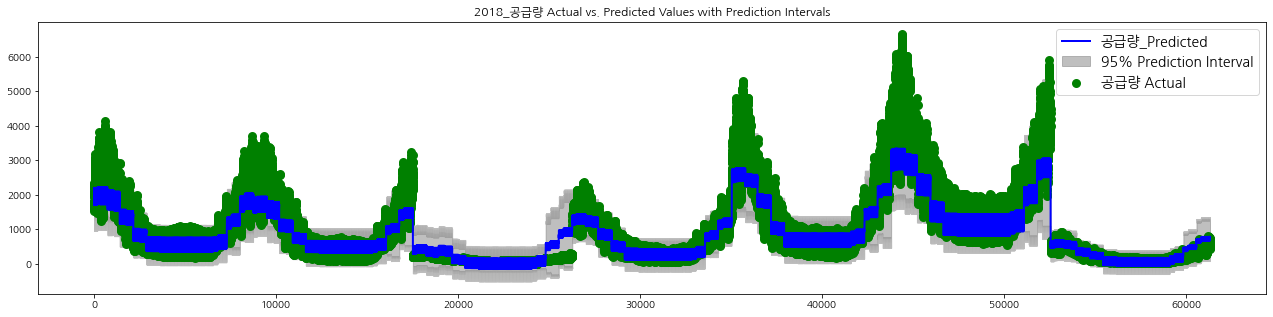

In [46]:
plot_results(df_figure)

In [318]:
# 공급처 0인것 중 1월달 data만 뽑아서 확인
data_0 = df_figure[df_figure['구분']==0]
data_0_1 = data_0[data_0['month']==1]
data_0_1

,index,시간,구분,공급량,year,month,day,index,Predictions,Predictions_lower,Predictions_upper
0,306768,1,0,1765.008,2018,1,1,0,1789.136013,1036.358495,2541.913531
1,306769,2,0,1679.186,2018,1,1,1,1701.597030,948.819513,2454.374548
2,306770,3,0,1610.885,2018,1,1,2,1700.937752,948.160235,2453.715270
3,306771,4,0,1604.123,2018,1,1,3,1700.937752,948.160235,2453.715270
4,306772,5,0,1711.506,2018,1,1,4,1737.175261,984.397743,2489.952779
...,...,...,...,...,...,...,...,...,...,...,...
739,307507,20,0,3060.835,2018,1,31,739,2156.221924,1349.499699,2962.944149
740,307508,21,0,2993.419,2018,1,31,740,2156.221924,1349.499699,2962.944149
741,307509,22,0,2903.040,2018,1,31,741,2156.221924,1349.499699,2962.944149
742,307510,23,0,2768.297,2018,1,31,742,2156.221924,1349.499699,2962.944149


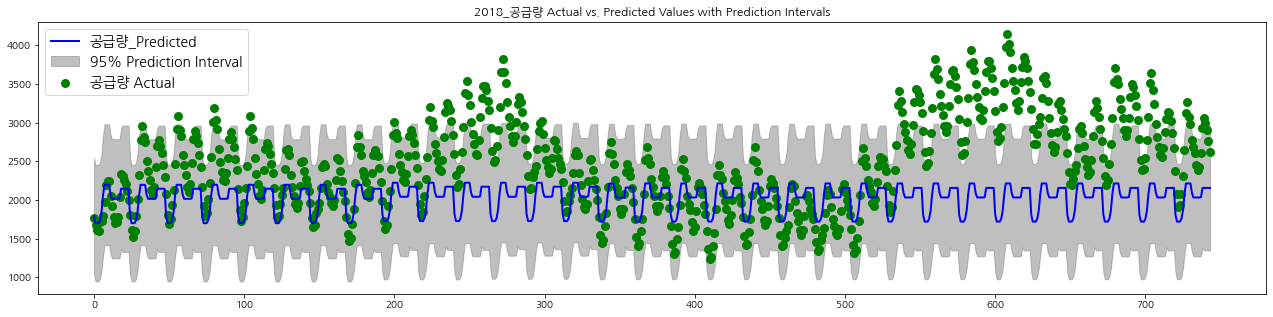

In [319]:
plot_results(data_0_1)

In [337]:
# 공급처 4인것 중 7월달 data만 뽑아서 확인
data_4 = df_figure[df_figure['구분']==4]
data_4_7 = data_4[data_4['month']==7]
data_4_7

,index,시간,구분,공급량,year,month,day,index,Predictions,Predictions_lower,Predictions_upper
39384,346152,1,4,446.444,2018,7,1,39384,601.969729,134.735617,1069.203841
39385,346153,2,4,329.556,2018,7,1,39385,481.555692,14.321580,948.789804
39386,346154,3,4,268.664,2018,7,1,39386,480.896414,13.662302,948.130526
39387,346155,4,4,240.262,2018,7,1,39387,480.896414,13.662302,948.130526
39388,346156,5,4,333.991,2018,7,1,39388,517.133923,49.899811,984.368035
...,...,...,...,...,...,...,...,...,...,...,...
40123,346891,20,4,702.424,2018,7,31,40123,854.472939,335.851173,1373.094704
40124,346892,21,4,680.607,2018,7,31,40124,854.472939,335.851173,1373.094704
40125,346893,22,4,630.866,2018,7,31,40125,827.104427,308.482661,1345.726192
40126,346894,23,4,545.510,2018,7,31,40126,825.797993,304.596803,1346.999183


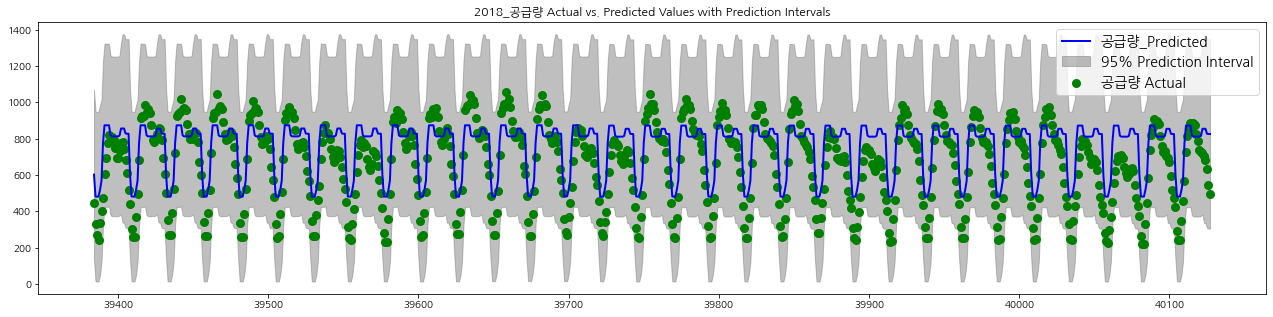

In [338]:
plot_results(data_4_7)

In [339]:
# 공급처 2인것 중 11월달 data만 뽑아서 확인
data_2 = df_figure[df_figure['구분']==2]
data_2_11 = data_2[data_2['month']==11]
data_2_11

,index,시간,구분,공급량,year,month,day,index,Predictions,Predictions_lower,Predictions_upper
24816,331584,1,2,119.466,2018,11,1,24816,484.051111,-275.254629,1243.356851
24817,331585,2,2,108.292,2018,11,1,24817,393.227845,-366.077896,1152.533585
24818,331586,3,2,101.463,2018,11,1,24818,392.568566,-366.737174,1151.874307
24819,331587,4,2,98.980,2018,11,1,24819,392.568566,-366.737174,1151.874307
24820,331588,5,2,103.326,2018,11,1,24820,428.806075,-330.499665,1188.111815
...,...,...,...,...,...,...,...,...,...,...,...
25531,332299,20,2,183.408,2018,11,30,25531,636.409141,-366.008605,1638.826886
25532,332300,21,2,183.408,2018,11,30,25532,636.409141,-366.008605,1638.826886
25533,332301,22,2,180.925,2018,11,30,25533,636.409141,-366.008605,1638.826886
25534,332302,23,2,173.476,2018,11,30,25534,636.409141,-366.008605,1638.826886


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


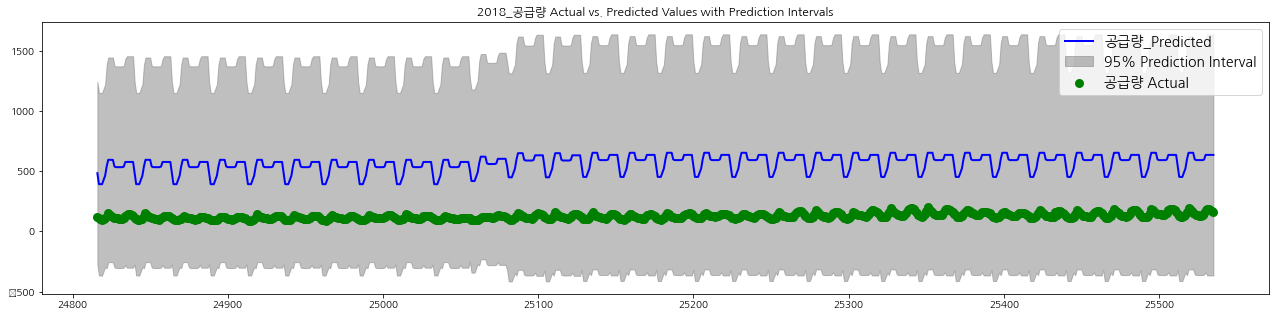

In [340]:
plot_results(data_2_11)

##### Log Normal 분포

In [ ]:
ngb_ln = NGBRegressor(Dist=LogNormal,random_state=0)

ngb_ln.fit(X_train, y_train)

Y_preds = ngb.predict(X_valid)
Y_dists = ngb.pred_dist(X_valid)

In [326]:
model_ngb = NGBRegressor(n_estimators=650,  natural_gradient=True, learning_rate = 0.01,Base=default_tree_learner, Dist=Normal, Score=MLE, verbose_eval =50)
model_ngb.fit(X_train, y_train, X_val = X_valid, Y_val = y_valid, early_stopping_rounds = 10)

[iter 0] loss=8.2311 val_loss=8.2200 scale=1.0000 norm=709.4098
[iter 50] loss=7.9373 val_loss=7.9290 scale=2.0000 norm=1115.4693
[iter 100] loss=7.7605 val_loss=7.7560 scale=1.0000 norm=455.2534
[iter 150] loss=7.5817 val_loss=7.5776 scale=1.0000 norm=375.4404
[iter 200] loss=7.4205 val_loss=7.4169 scale=1.0000 norm=321.3576
[iter 250] loss=7.2645 val_loss=7.2596 scale=2.0000 norm=561.3147
[iter 300] loss=7.1224 val_loss=7.1203 scale=1.0000 norm=251.9812
[iter 350] loss=7.0149 val_loss=7.0134 scale=2.0000 norm=468.3946
[iter 400] loss=6.9293 val_loss=6.9326 scale=1.0000 norm=221.7663
[iter 450] loss=6.8622 val_loss=6.8698 scale=1.0000 norm=213.2972
[iter 500] loss=6.8084 val_loss=6.8218 scale=1.0000 norm=206.8548
[iter 550] loss=6.7664 val_loss=6.7877 scale=0.5000 norm=100.8249
[iter 600] loss=6.7387 val_loss=6.7666 scale=0.5000 norm=99.1228


NGBRegressor(n_estimators=650,
             random_state=RandomState(MT19937) at 0x1ECE7160E18,
             verbose_eval=50)

In [327]:
y_train_ngb = model_ngb.pred_dist(X_train)
print("Train set RMSE: " + str(np.sqrt(mean_squared_error(y_train_ngb.loc, y_train))))

Train set RMSE: 299.3037683888623


In [328]:
y_valid_ngb= model_ngb.pred_dist(X_valid)
print("Validation set RMSE: " + str(np.sqrt(mean_squared_error(y_valid_ngb.loc, y_valid))))

Validation set RMSE: 297.1015133208762


In [329]:
y_test_ngb = model_ngb.pred_dist(X_test)
print("Validation set RMSE: " + str(np.sqrt(mean_squared_error(y_test_ngb.loc, y_answer))))

Validation set RMSE: 379.3513880336472


In [330]:
predictions = pd.DataFrame(y_test_ngb.loc, columns=['Predictions'])
predictions_upper = pd.DataFrame(y_test_ngb.dist.interval(0.95)[1], columns=['Predictions_upper'])
predictions_lower = pd.DataFrame(y_test_ngb.dist.interval(0.95)[0], columns=['Predictions_lower'])

In [331]:
ddd = pd.concat([predictions, predictions_lower, predictions_upper],axis=1).reset_index()
ddd

,index,Predictions,Predictions_lower,Predictions_upper
0,0,1807.788086,1131.461799,2484.114372
1,1,1708.522817,1032.196531,2384.849103
2,2,1705.264122,1028.937836,2381.590408
3,3,1705.264122,1028.937836,2381.590408
4,4,1749.382804,1073.056518,2425.709090
...,...,...,...,...
61315,61315,786.875109,366.665058,1207.085160
61316,61316,786.875109,366.665058,1207.085160
61317,61317,786.875109,366.665058,1207.085160
61318,61318,786.875109,366.665058,1207.085160


In [332]:
test = test.reset_index()

In [334]:
df_figures = pd.concat([test, ddd],axis=1)
df_figures

,level_0,index,시간,구분,공급량,year,month,day,index,Predictions,Predictions_lower,Predictions_upper
0,0,306768,1,0,1765.008,2018,1,1,0,1807.788086,1131.461799,2484.114372
1,1,306769,2,0,1679.186,2018,1,1,1,1708.522817,1032.196531,2384.849103
2,2,306770,3,0,1610.885,2018,1,1,2,1705.264122,1028.937836,2381.590408
3,3,306771,4,0,1604.123,2018,1,1,3,1705.264122,1028.937836,2381.590408
4,4,306772,5,0,1711.506,2018,1,1,4,1749.382804,1073.056518,2425.709090
...,...,...,...,...,...,...,...,...,...,...,...,...
61315,61315,368083,20,6,681.033,2018,12,31,61315,786.875109,366.665058,1207.085160
61316,61316,368084,21,6,669.961,2018,12,31,61316,786.875109,366.665058,1207.085160
61317,61317,368085,22,6,657.941,2018,12,31,61317,786.875109,366.665058,1207.085160
61318,61318,368086,23,6,610.953,2018,12,31,61318,786.875109,366.665058,1207.085160


In [335]:
df_figures.isna().sum()

level_0              0
index                0
시간                   0
구분                   0
공급량                  0
year                 0
month                0
day                  0
index                0
Predictions          0
Predictions_lower    0
Predictions_upper    0
dtype: int64

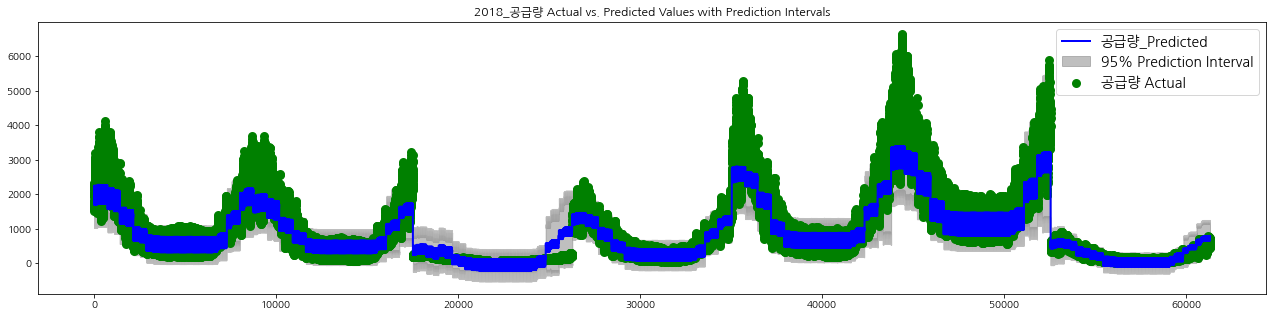

In [336]:
plot_results(df_figures)

In [343]:
# 공급처 2인것 중 11월달 data만 뽑아서 확인
data_00 = df_figures[df_figures['구분']==0]
data_00_1 = data_00[data_00['month']==1]
data_00_1

,level_0,index,시간,구분,공급량,year,month,day,index,Predictions,Predictions_lower,Predictions_upper
0,0,306768,1,0,1765.008,2018,1,1,0,1807.788086,1131.461799,2484.114372
1,1,306769,2,0,1679.186,2018,1,1,1,1708.522817,1032.196531,2384.849103
2,2,306770,3,0,1610.885,2018,1,1,2,1705.264122,1028.937836,2381.590408
3,3,306771,4,0,1604.123,2018,1,1,3,1705.264122,1028.937836,2381.590408
4,4,306772,5,0,1711.506,2018,1,1,4,1749.382804,1073.056518,2425.709090
...,...,...,...,...,...,...,...,...,...,...,...,...
739,739,307507,20,0,3060.835,2018,1,31,739,2194.915805,1438.798610,2951.033000
740,740,307508,21,0,2993.419,2018,1,31,740,2194.915805,1438.798610,2951.033000
741,741,307509,22,0,2903.040,2018,1,31,741,2194.915805,1438.798610,2951.033000
742,742,307510,23,0,2768.297,2018,1,31,742,2194.915805,1438.798610,2951.033000


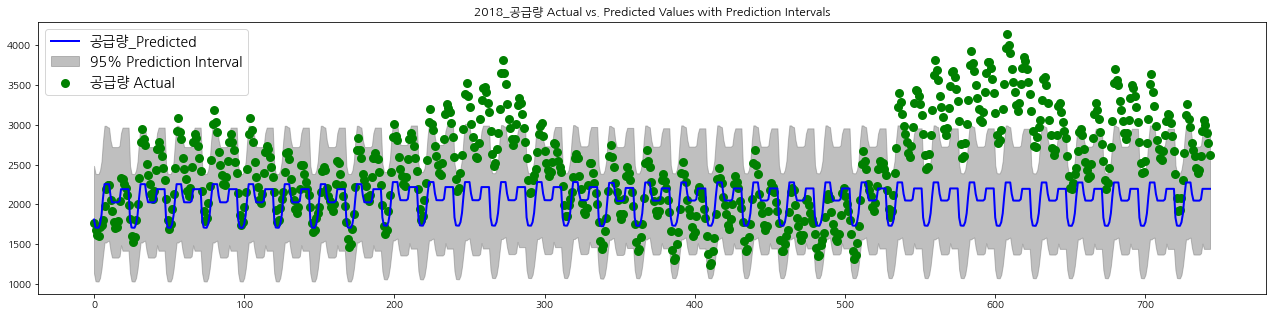

In [344]:
plot_results(data_00_1)

In [175]:
b1 = DecisionTreeRegressor(random_state=0)
b2 = XGBRegressor(random_state=0)
b3 = Ridge(random_state=0)

param_grid = {"n_estimators": [20, 50],
              "minibatch_frac": [1.0, 0.5],
              "Base": [b1, b2, b3]
             }

ngb = NGBRegressor(natural_gradient=True, verbose=False, Dist=Normal)

grid_search = GridSearchCV(ngb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:02:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:06:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:10:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:17:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:21:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:28:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:28:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:31:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:37:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:40:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:48:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:48:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:48:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[17:50:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:56:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:00:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:06:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:09:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:11:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:13:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:15:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:17:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:19:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 